<a href="https://colab.research.google.com/github/EdwSanA/DPro_Tareas/blob/main/Trigo_tablero_de_ajedrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problema del trigo y el tablero de ajedrez**

Similar a la historia del arroz de Soroshi Shinzaemon, existe la historia del trigo y el tablero de ajedrez. Con esto como tema, nos familiarizaremos con el uso de NumPy , una biblioteca numérica para manejar matrices multidimensionales.

Si en un tablero de ajedrez se colocara trigo en cada casilla de manera que se colocara un grano en la primera casilla, dos en la segunda, cuatro en la tercera y así sucesivamente (duplicando el número de granos en cada casilla subsiguiente), ¿cuántos granos de trigo habría en el tablero de ajedrez al final?

Problema del trigo y el tablero de ajedrez - Wikipedia (Última consulta: 31 de mayo de 2019)

El problema es encontrar el número final de granos de trigo en un tablero de ajedrez de 8x8 colocándolos en el orden 1, 2, 4.

In [2]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Disponer el trigo en una tabla con 4 cuadrados (lista).：{}".format(small_board_list))

Disponer el trigo en una tabla con 4 cuadrados (lista).：[1, 2, 4, 8]


In [3]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("Disponer el trigo en un tablero con 4 cuadrados (ndarray).：{}".format(small_board_ndarray))

Disponer el trigo en un tablero con 4 cuadrados (ndarray).：[1 2 4 8]


**PROBLEMA 1: # Tablero de ajedrez 4.8 x 8 (2*2)**

Representa un tablero de ajedrez de 2 x 2 cuadrados con ndarray y calcula la cantidad de trigo en cada cuadrado. Después de colocar un trigo en el cuadrado superior izquierdo, coloca dos a la derecha, cuatro a la izquierda y ocho a la derecha.

Modifique la forma del ndarray creado con el código de muestra.

In [4]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2 * small_board_list[-1])
small_board_ndarray = np.array(small_board_list).reshape(2, 2)

print("The number of wheats on a 2x2 shaped ndarray are: \n{}".format(small_board_ndarray))


The number of wheats on a 2x2 shaped ndarray are: 
[[1 2]
 [4 8]]


PROBLEMA 2:
Crea una función que devuelva un ndarray con la cantidad de trigo en un tablero de ajedrez de nxm. Luego, usa esta función para encontrar la cantidad de trigo en el tablero de ajedrez de 8x8 cuadrados.

In [ ]:
def wheat_on_chessboard(n_rows, n_cols):
    chess_squares = n_rows * n_cols
    chess_board_list = [1]
    for square in range(chess_squares - 1):
        chess_board_list.append(2 * chess_board_list[square])

    return np.array(chess_board_list).reshape(n_rows, n_cols).astype(np.uint64)

chessboard_8x8 = wheat_on_chessboard(8, 8)
print(f"Number of wheat on a 8x8 chessboard \n{chessboard_8x8}")


Number of wheat on a 8x8 chessboard 
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
    

PROBLEMA 3: graficar lo del ejercicio 2. muestra el crecimiento exponencial de numero de granos de trigo

Total number of wheats on the 8x8 chessboard 
18446744073709551615


Average of each column in the 8x8 chessboard 
[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]




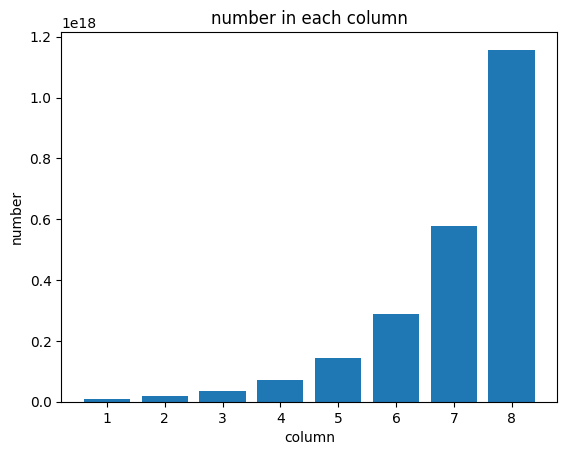

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

chessboard_8x8 = wheat_on_chessboard(8, 8)

# total number of wheats
total_wheat = np.sum(chessboard_8x8)
print(f"Total number of wheats on the 8x8 chessboard \n{total_wheat}")
print("\n")

# average of each column
column_averages = np.mean(chessboard_8x8, axis=0)
print(f"Average of each column in the 8x8 chessboard \n{column_averages}")
print("\n")

# bar chart for column averages
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1, 9), column_averages)  # The number of each column is shown as a provisional value
plt.show()


Problema 4: heat map of the number of wheat

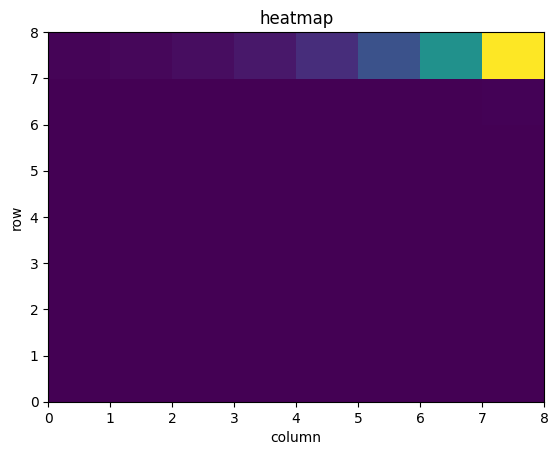

In [ ]:
chessboard_8x8 = wheat_on_chessboard(8, 8)

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chessboard_8x8)
plt.show()


PROBLEMA 5: Comparar la primera mitad y la segunda mitad

In [ ]:
chessboard_8x8 = wheat_on_chessboard(8, 8)

# first half (0-3)
first_half = chessboard_8x8[0:4, :]
first_half_sum = np.sum(first_half)

# second half (4-7)
second_half = chessboard_8x8[4:8, :]
second_half_sum = np.sum(second_half)

ratio = second_half_sum / first_half_sum

print(f"first half: {first_half_sum}")
print(f"second half: {second_half_sum}")
print(f"The second half contains {ratio} times more than the first half")


first half: 4294967295
second half: 18446744069414584320
The second half contains 4294967296.0 times more than the first half


PROBLEMA 6: Métodos alternativos para crear el tablero de ajedrez


In [ ]:
# method 1: using np.append()
def wheat_on_chessboard_append(n_rows, n_cols):
    chess_squares = n_rows * n_cols
    wheat_counts = np.array([1], dtype=np.uint64)
    for _ in range(chess_squares - 1):
        wheat_counts = np.append(wheat_counts, 2 * wheat_counts[-1])

    return wheat_counts.reshape(n_rows, n_cols)

# method 2: using broadcast
def wheat_on_chessboard_broadcast(n_rows, n_cols):
    chess_squares = n_rows * n_cols
    indices = np.arange(chess_squares, dtype=np.uint64)
    wheats_counts = 2 ** indices
    return wheats_counts.reshape(n_rows, n_cols)

chessboard_8x8_append = wheat_on_chessboard_append(8, 8)
chessboard_8x8_broadcast = wheat_on_chessboard_broadcast(8, 8)

print(f"chessboard_8x8_append \n{chessboard_8x8_append}")
print("\n")
print(f"chessboard_8x8_broadcast \n{chessboard_8x8_broadcast}")


chessboard_8x8_append 
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177

Problema 7: Comparar el tiempo de cálculo

In [ ]:
# Method 1: Using Python lists
%%timeit
def wheat_on_chessboard(n_rows, n_cols):
    chess_squares = n_rows * n_cols
    chess_board_list = [1]
    for square in range(chess_squares - 1):
        chess_board_list.append(2 * chess_board_list[square])

    return np.array(chess_board_list).reshape(n_rows, n_cols).astype(np.uint64)


82.1 ns ± 1.06 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
# Method 2: Using np.append()
%%timeit
def wheat_on_chessboard_append(n_rows, n_cols):
    chess_squares = n_rows * n_cols
    wheat_counts = np.array([1], dtype=np.uint64)
    for _ in range(chess_squares - 1):
        wheat_counts = np.append(wheat_counts, 2 * wheat_counts[-1])

    return wheat_counts.reshape(n_rows, n_cols)


97.6 ns ± 25.7 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
# Method 3: Using broadcasting
%%timeit
def wheat_on_chessboard_broadcast(n_rows, n_cols):
    chess_squares = n_rows * n_cols
    indices = np.arange(chess_squares, dtype=np.uint64)
    wheat_counts = 2 ** indices
    return wheat_counts.reshape(n_rows, n_cols)


81.3 ns ± 1.17 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
